In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:
data=pd.read_excel('Music.xlsx')

In [3]:
data

,Age,Gender,Genre
0,20,1,HIP HOP
1,24,1,HIP HOP
2,26,1,HIP HOP
3,27,1,ROCK
4,29,1,ROCK
5,30,1,ROCK
6,15,1,POP
7,17,1,POP
8,19,1,POP
9,31,1,CLASSICAL


In [4]:
X=data.drop('Genre',axis=1)
X

,Age,Gender
0,20,1
1,24,1
2,26,1
3,27,1
4,29,1
5,30,1
6,15,1
7,17,1
8,19,1
9,31,1


In [5]:
y=data['Genre']
y

0       HIP HOP
1       HIP HOP
2       HIP HOP
3          ROCK
4          ROCK
5          ROCK
6           POP
7           POP
8           POP
9     CLASSICAL
10    CLASSICAL
11    CLASSICAL
12    CLASSICAL
13    CLASSICAL
14        DANCE
15        DANCE
16        DANCE
17         JAZZ
18         JAZZ
19         JAZZ
20      POPULAR
21      POPULAR
22      POPULAR
23    CLASSICAL
24    CLASSICAL
25    CLASSICAL
26    CLASSICAL
27    CLASSICAL
Name: Genre, dtype: object

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model=DecisionTreeClassifier(criterion='entropy')

In [8]:
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
predictions=model.predict([[21,1],[31,0]])

C:\Users\admin\miniconda3\envs\M_LAB\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
predictions

array(['HIP HOP', 'CLASSICAL'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
X_train

,Age,Gender
17,27,0
22,19,0
11,37,1
13,50,1
15,24,0
1,24,1
4,29,1
5,30,1
2,26,1
16,26,0


In [14]:
y_train

17         JAZZ
22      POPULAR
11    CLASSICAL
13    CLASSICAL
15        DANCE
1       HIP HOP
4          ROCK
5          ROCK
2       HIP HOP
16        DANCE
23    CLASSICAL
3          ROCK
26    CLASSICAL
24    CLASSICAL
18         JAZZ
27    CLASSICAL
20      POPULAR
7           POP
10    CLASSICAL
14        DANCE
19         JAZZ
6           POP
Name: Genre, dtype: object

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
predictions2=model.predict(X_test)

In [17]:
predictions2

array(['CLASSICAL', 'CLASSICAL', 'POP', 'POPULAR', 'HIP HOP', 'CLASSICAL'],
      dtype=object)

In [18]:
y_test

9     CLASSICAL
25    CLASSICAL
8           POP
21      POPULAR
0       HIP HOP
12    CLASSICAL
Name: Genre, dtype: object

In [19]:
 from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,predictions2)

1.0

In [21]:
joblib.dump(model,'music-recommendation')

['music-recommendation']

In [22]:
from sklearn.tree import export_graphviz

In [23]:
export_graphviz(model,out_file='music-recommendation.dot',feature_names=['Age','Gender'],
                class_names=sorted(y.unique()),
                label='all',filled=True,rounded=True)

In [24]:
import pydotplus
from IPython.display import Image

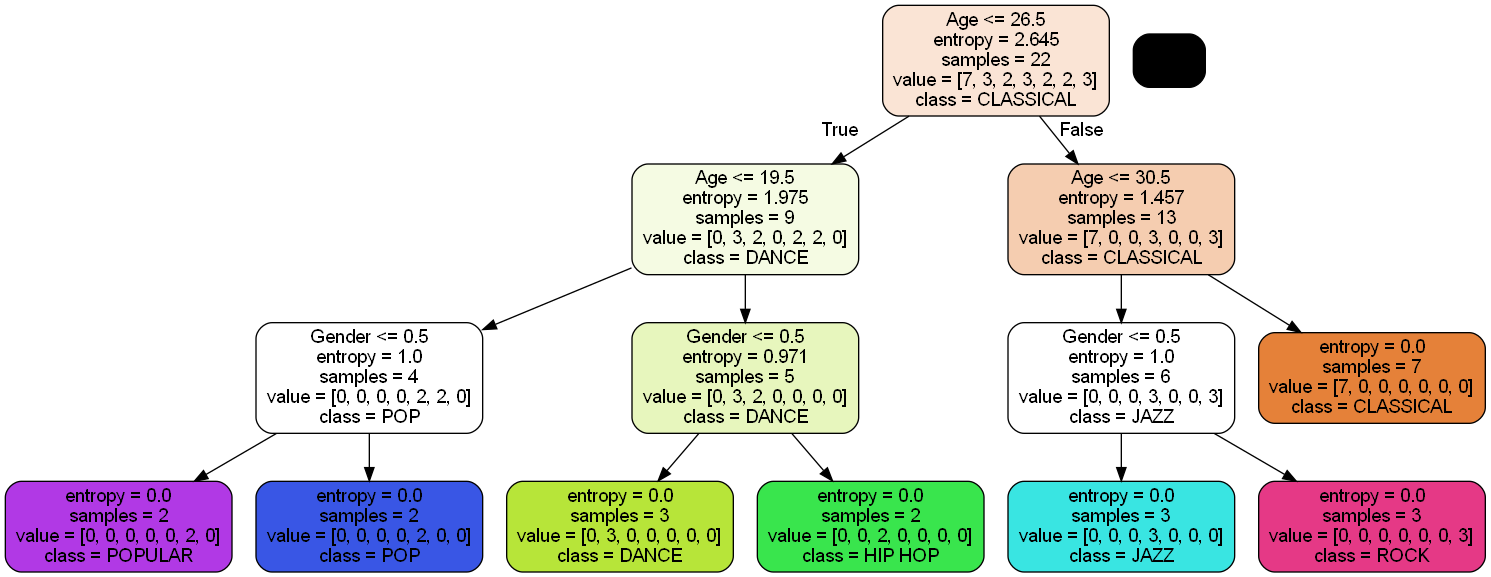

In [25]:
graph1=pydotplus.graph_from_dot_file('music-recommendation.dot')
Image(graph1.create_png())